本章采用的算法为ID3

In [1]:
import operator
from math import log

In [2]:
def createDataSet():
    """DateSet 基础数据集

    Args:
        无需传入参数
    Returns:
        返回数据集和对应的label标签
    """
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    # dataSet = [['yes'],
    #         ['yes'],
    #         ['no'],
    #         ['no'],
    #         ['no']]
    # labels  露出水面   脚蹼
    labels = ['no surfacing', 'flippers']
    # change to discrete values
    return dataSet, labels

In [3]:
def calcShannonEnt(dataSet):
    """calcShannonEnt(calculate Shannon entropy 计算给定数据集的香农熵)

    Args:
        dataSet 数据集
    Returns:
        返回 每一组feature下的某个分类下，香农熵的信息期望
    """
    # -----------计算香农熵的第一种实现方式start--------------------------------------------------------------------------------
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    # 下面输出我们测试的数据集的一些信息
    # 例如：<type 'list'> numEntries:  5 是下面的代码的输出
    # print type(dataSet), 'numEntries: ', numEntries

    # 计算分类标签label出现的次数
    labelCounts = {}
    # the the number of unique elements and their occurance
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        # print '-----', featVec, labelCounts

    # 对于label标签的占比，求出label标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率。
        prob = float(labelCounts[key])/numEntries
        # log base 2 
        # 计算香农熵，以 2 为底求对数
        shannonEnt -= prob * log(prob, 2)
        # print '---', prob, prob * log(prob, 2), shannonEnt
    # -----------计算香农熵的第一种实现方式end--------------------------------------------------------------------------------

    # # -----------计算香农熵的第二种实现方式start--------------------------------------------------------------------------------
    # # 统计标签出现的次数
    # label_count = Counter(data[-1] for data in dataSet)
    # # 计算概率
    # probs = [p[1] / len(dataSet) for p in label_count.items()]
    # # 计算香农熵
    # shannonEnt = sum([-p * log(p, 2) for p in probs])
    # # -----------计算香农熵的第二种实现方式end--------------------------------------------------------------------------------
    return shannonEnt


In [4]:
myDat, labels = createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [5]:
myDat[0][-1] = 'maybe'
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [6]:
calcShannonEnt(myDat)

1.3709505944546687

In [7]:
def splitDataSet(dataSet, index, value):
    """splitDataSet(通过遍历dataSet数据集，求出index对应的colnum列的值为value的行)
        就是依据index列进行分类，如果index列的数据等于 value的时候，就要将 index 划分到我们创建的新的数据集中
    Args:
        dataSet 数据集                 待划分的数据集
        index 表示每一行的index列        划分数据集的特征
        value 表示index列对应的value值   需要返回的特征的值。
    Returns:
        index列为value的数据集【该数据集需要排除index列】
    """
    # -----------切分数据集的第一种方式 start------------------------------------
    retDataSet = []
    for featVec in dataSet: 
        # index列为value的数据集【该数据集需要排除index列】
        # 判断index列的值是否为value
        if featVec[index] == value:
            # chop out index used for splitting
            # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reducedFeatVec = featVec[:index]
            '''
            请百度查询一下： extend和append的区别
            list.append(object) 向列表中添加一个对象object
            list.extend(sequence) 把一个序列seq的内容添加到列表中
            1、使用append的时候，是将new_media看作一个对象，整体打包添加到music_media对象中。
            2、使用extend的时候，是将new_media看作一个序列，将这个序列和music_media序列合并，并放在其后面。
            result = []
            result.extend([1,2,3])
            print result
            result.append([4,5,6])
            print result
            result.extend([7,8,9])
            print result
            结果：
            [1, 2, 3]
            [1, 2, 3, [4, 5, 6]]
            [1, 2, 3, [4, 5, 6], 7, 8, 9]
            '''
            reducedFeatVec.extend(featVec[index+1:])
            # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
            # 收集结果值 index列为value的行【该行需要排除index列】
            retDataSet.append(reducedFeatVec)
    # -----------切分数据集的第一种方式 end------------------------------------

    # # -----------切分数据集的第二种方式 start------------------------------------
    # retDataSet = [data for data in dataSet for i, v in enumerate(data) if i == axis and v == value]
    # # -----------切分数据集的第二种方式 end------------------------------------
    return retDataSet

In [8]:
splitDataSet(myDat,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [9]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

In [10]:
def chooseBestFeatureToSplit(dataSet):
    """chooseBestFeatureToSplit(选择最好的特征)

    Args:
        dataSet 数据集
    Returns:
        bestFeature 最优的特征列
    """

    # -----------选择最优特征的第一种方式 start------------------------------------
    # 求第一行有多少列的 Feature, 最后一列是label列嘛
    numFeatures = len(dataSet[0]) - 1
    # label的信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取每一个实例的第i+1个feature，组成list集合
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print ('infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature
    # -----------选择最优特征的第一种方式 end------------------------------------

    # # -----------选择最优特征的第二种方式 start------------------------------------
    # # 计算初始香农熵
    # base_entropy = calcShannonEnt(dataSet)
    # best_info_gain = 0
    # best_feature = -1
    # # 遍历每一个特征
    # for i in range(len(dataSet[0]) - 1):
    #     # 对当前特征进行统计
    #     feature_count = Counter([data[i] for data in dataSet])
    #     # 计算分割后的香农熵
    #     new_entropy = sum(feature[1] / float(len(dataSet)) * calcShannonEnt(splitDataSet(dataSet, i, feature[0])) \
    #                    for feature in feature_count.items())
    #     # 更新值
    #     info_gain = base_entropy - new_entropy
    #     print('No. {0} feature info gain is {1:.3f}'.format(i, info_gain))
    #     if info_gain > best_info_gain:
    #         best_info_gain = info_gain
    #         best_feature = i
    # return best_feature
    # # -----------选择最优特征的第二种方式 end------------------------------------

In [11]:
chooseBestFeatureToSplit(myDat)

infoGain= 0.41997309402197514 bestFeature= 0 1.3709505944546687 0.9509775004326936
infoGain= 0.17095059445466854 bestFeature= 1 1.3709505944546687 1.2000000000000002


0

In [12]:
def majorityCnt(classList):
    """majorityCnt(选择出现次数最多的一个结果)

    Args:
        classList label列的集合
    Returns:
        bestFeature 最优的特征列
    """
    # -----------majorityCnt的第一种方式 start------------------------------------
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 倒叙排列classCount得到一个字典集合，然后取出第一个就是结果（yes/no），即出现次数最多的结果
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # print 'sortedClassCount:', sortedClassCount
    return sortedClassCount[0][0]
    # -----------majorityCnt的第一种方式 end------------------------------------

    # # -----------majorityCnt的第二种方式 start------------------------------------
    # major_label = Counter(classList).most_common(1)[0]
    # return major_label
    # # -----------majorityCnt的第二种方式 end------------------------------------


In [13]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求出剩余的标签label
        subLabels = labels[:]
        # 遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        # print 'myTree', value, myTree
    return myTree


In [14]:
createTree(myDat, labels)

infoGain= 0.41997309402197514 bestFeature= 0 1.3709505944546687 0.9509775004326936
infoGain= 0.17095059445466854 bestFeature= 1 1.3709505944546687 1.2000000000000002
infoGain= 0.9182958340544894 bestFeature= 0 1.584962500721156 0.6666666666666666


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'maybe'}}}}

In [15]:
def classify(inputTree, featLabels, testVec):
    """classify(给输入的节点，进行分类)

    Args:
        inputTree  决策树模型
        featLabels Feature标签对应的名称
        testVec    测试输入的数据
    Returns:
        classLabel 分类的结果值，需要映射label才能知道名称
    """
    # 获取tree的根节点对于的key值
    firstStr = list(inputTree.keys())[0]
    # 通过key得到根节点对应的value
    secondDict = inputTree[firstStr]
    # 判断根节点名称获取根节点在label中的先后顺序，这样就知道输入的testVec怎么开始对照树来做分类
    featIndex = featLabels.index(firstStr)
    # 测试数据，找到根节点对应的label位置，也就知道从输入的数据的第几位来开始分类
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print ('+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat)
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel

## Matplotlib注解绘制树形图

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
%matplotlib inline
# 定义文本框 和 箭头格式 【 sawtooth 波浪方框, round4 矩形方框 , fc表示字体颜色的深浅 0.1~0.9 依次变浅，没错是变浅】
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


In [17]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',\
    xytext=centerPt, textcoords='axes fraction',va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

In [18]:
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode('决策节点', (0.5, 0.1),(0.1, 0.5), decisionNode)
    plotNode('叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

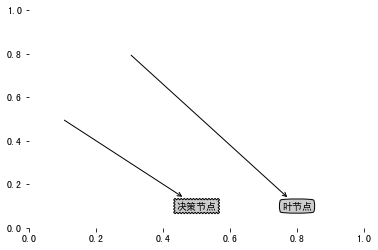

In [19]:
createPlot()

In [20]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是否为dict, 不是+1
        if type(secondDict[key]) is dict:
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

In [21]:
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是不是dict, 求分枝的深度
        if type(secondDict[key]) is dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        # 记录最大的分支深度
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [22]:
# 测试数据集
def retrieveTree(i):
    listOfTrees = [
        {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
        {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return listOfTrees[i]


# myTree = retrieveTree(1)
# createPlot(myTree)

In [23]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [24]:
myTree = retrieveTree(0)
getNumLeafs(myTree)

3

In [25]:
getTreeDepth(myTree)

2

In [26]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [27]:
def plotTree(myTree, parentPt, nodeTxt):
    # 获取叶子节点的数量
    numLeafs = getNumLeafs(myTree)
    # 获取树的深度
    # depth = getTreeDepth(myTree)

    # 找出第1个中心点的位置，然后与 parentPt定点进行划线
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    # print cntrPt
    # 并打印输入对应的文字
    plotMidText(cntrPt, parentPt, nodeTxt)

    firstStr = list(myTree.keys())[0]
    # 可视化Node分支点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 根节点的值
    secondDict = myTree[firstStr]
    # y值 = 最高点-层数的高度[第二个节点位置]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        # 判断该节点是否是Node节点
        if type(secondDict[key]) is dict:
            # 如果是就递归调用[recursion]
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 如果不是，就在原来节点一半的地方找到节点的坐标
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            # 可视化该节点位置
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 并打印输入对应的文字
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD



In [28]:

def createPlot(inTree):
    # 创建一个figure的模版
    fig = plt.figure(1, facecolor='green')
    fig.clf()

    axprops = dict(xticks=[], yticks=[])
    # 表示创建一个1行，1列的图，createPlot.ax1 为第 1 个子图，
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)

    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    # 半个节点的长度
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()


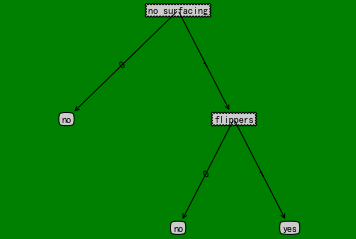

In [29]:
myTree = retrieveTree(0)
createPlot(myTree)

In [30]:
myTree['no surfacing'][3] = 'maybe'
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

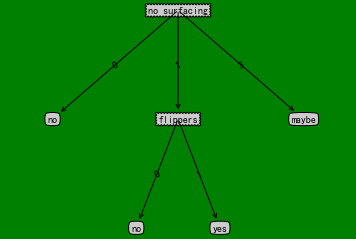

In [31]:
createPlot(myTree)

## 测试和储存分类器

In [32]:
def classify(inputTree, featLabels, testVec):
    """classify(给输入的节点，进行分类)

    Args:
        inputTree  决策树模型
        featLabels Feature标签对应的名称
        testVec    测试输入的数据
    Returns:
        classLabel 分类的结果值，需要映射label才能知道名称
    """
    # 获取tree的根节点对于的key值
    firstStr = list(inputTree.keys())[0]
    # 通过key得到根节点对应的value
    secondDict = inputTree[firstStr]
    # 判断根节点名称获取根节点在label中的先后顺序，这样就知道输入的testVec怎么开始对照树来做分类
    featIndex = featLabels.index(firstStr)
    # 测试数据，找到根节点对应的label位置，也就知道从输入的数据的第几位来开始分类
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print ('+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat)
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel

In [33]:
myDat, labels = createDataSet()
labels
myTree = retrieveTree(0)

In [34]:
classify(myTree, labels, [1,0])

+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} --- 1 >>> {'flippers': {0: 'no', 1: 'yes'}}
+++ flippers xxx {0: 'no', 1: 'yes'} --- 0 >>> no


'no'

In [35]:
classify(myTree, labels, [1,1])

+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} --- 1 >>> {'flippers': {0: 'no', 1: 'yes'}}
+++ flippers xxx {0: 'no', 1: 'yes'} --- 1 >>> yes


'yes'

In [36]:
def storeTree(inputTree, filename):
    import pickle
    # -------------- 第一种方法 start --------------
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()
    # -------------- 第一种方法 end --------------

    # -------------- 第二种方法 start --------------
    with open(filename, 'wb') as fw:
        pickle.dump(inputTree, fw)
    # -------------- 第二种方法 start --------------


In [37]:
def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)

In [38]:
storeTree(myTree, 'classifierStorage.txt')
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 案例 用决策树预测隐形眼镜类型

infoGain= 0.03939650364612124 bestFeature= 0 1.3260875253642983 1.286691021718177
infoGain= 0.039510835423565815 bestFeature= 1 1.3260875253642983 1.2865766899407325
infoGain= 0.37700523001147723 bestFeature= 2 1.3260875253642983 0.9490822953528211
infoGain= 0.5487949406953986 bestFeature= 3 1.3260875253642983 0.7772925846688997
infoGain= 0.22125183600446618 bestFeature= 0 1.5545851693377994 1.3333333333333333
infoGain= 0.09543725231055489 bestFeature= 1 1.5545851693377994 1.4591479170272446
infoGain= 0.7704260414863776 bestFeature= 2 1.5545851693377994 0.7841591278514218
infoGain= 0.3166890883150208 bestFeature= 0 0.6500224216483541 0.3333333333333333
infoGain= 0.19087450462110933 bestFeature= 1 0.6500224216483541 0.4591479170272448
infoGain= 1.0 bestFeature= 0 1.0 0.0
infoGain= 0.2516291673878229 bestFeature= 0 0.9182958340544896 0.6666666666666666
infoGain= 0.4591479170272448 bestFeature= 1 0.9182958340544896 0.4591479170272448
infoGain= 0.9182958340544896 bestFeature= 0 0.918295834

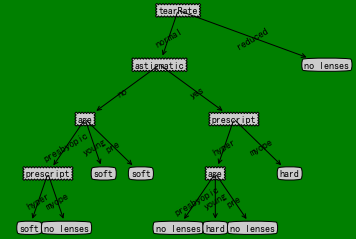

In [39]:
# 加载隐形眼镜相关的 文本文件 数据
fr = open('lenses.txt')
# 解析数据，获得 features 数据
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
# 得到数据的对应的 Labels
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
# 使用上面的创建决策树的代码，构造预测隐形眼镜的决策树
lensesTree = createTree(lenses, lensesLabels)
print (lensesTree)
# 画图可视化展现
createPlot(lensesTree)